# Using Python's ODE Suite

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline
np.seterr(divide='ignore');

## Simple Usage

In [2]:
# Dynamics function
def simple_golf(t, z):
    '''
        z[0] = x(t)
        z[1] = y(t)
        z[3] = y'(t)
    '''
    # Vx is defined globally
    return [Vx, z[2] , -9.81]

In [3]:
# IVP parameters
tspan = [0, 10]
y0 = [0, 0, 15]
Vx = 25.

In [13]:
# Call the numerical solver
sol = solve_ivp(simple_golf, tspan, y0, max_step=1) # try adding max_step=1

In [14]:
type(sol)

scipy.integrate._ivp.ivp.OdeResult

In [15]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.430e-05 ...  9.381e+00  1.000e+01]
        y: [[ 0.000e+00  8.574e-04 ...  2.345e+02  2.500e+02]
            [ 0.000e+00  5.145e-04 ... -2.909e+02 -3.405e+02]
            [ 1.500e+01  1.500e+01 ... -7.703e+01 -8.310e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 92
     njev: 0
      nlu: 0

In [16]:
print(sol.t)
print(len(sol.t))

[0.00000000e+00 3.42974305e-05 3.77271736e-04 3.80701479e-03
 3.81044453e-02 3.81078751e-01 1.38107875e+00 2.38107875e+00
 3.38107875e+00 4.38107875e+00 5.38107875e+00 6.38107875e+00
 7.38107875e+00 8.38107875e+00 9.38107875e+00 1.00000000e+01]
16


In [17]:
print(len(sol.y))
print(sol.y)

3
[[ 0.00000000e+00  8.57435763e-04  9.43179339e-03  9.51753697e-02
   9.52611133e-01  9.52696876e+00  3.45269688e+01  5.95269688e+01
   8.45269688e+01  1.09526969e+02  1.34526969e+02  1.59526969e+02
   1.84526969e+02  2.09526969e+02  2.34526969e+02  2.50000000e+02]
 [ 0.00000000e+00  5.14455688e-04  5.65837789e-03  5.70341319e-02
   5.64444871e-01  5.00387218e+00  1.13604896e+01  7.90710710e+00
  -5.35627544e+00 -2.84296580e+01 -6.13130405e+01 -1.04006423e+02
  -1.56509806e+02 -2.18823188e+02 -2.90946571e+02 -3.40500000e+02]
 [ 1.50000000e+01  1.49996635e+01  1.49962990e+01  1.49626532e+01
   1.46261954e+01  1.12616175e+01  1.45161746e+00 -8.35838254e+00
  -1.81683825e+01 -2.79783825e+01 -3.77883825e+01 -4.75983825e+01
  -5.74083825e+01 -6.72183825e+01 -7.70283825e+01 -8.31000000e+01]]


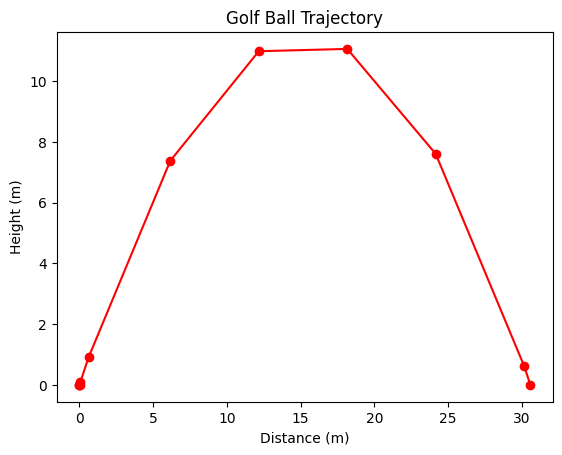

In [23]:
# Plot the solution
plt.plot(sol.y[0], sol.y[1], 'ro-');
plt.title('Golf Ball Trajectory')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)');

In [ ]:
# The system state at the end
sol.y[:,-1]

## Passing additional parameters

In [10]:
# Suppose we want to pass Vx as a parameter to our dynamics function, like this.
def simple_golf2(t, z, Vx):
    '''
        z[0] = x(t)
        z[1] = y(t)
        z[3] = y'(t)
    '''
    return [Vx, z[2] , -9.81]

In [11]:
# We can create a simple wrapper for our dynamics function, like this:
fun = lambda t,x: simple_golf2(t,x,20)  # Vx will be passed through as a constant
sol = solve_ivp(fun, tspan, y0, max_step=1.)

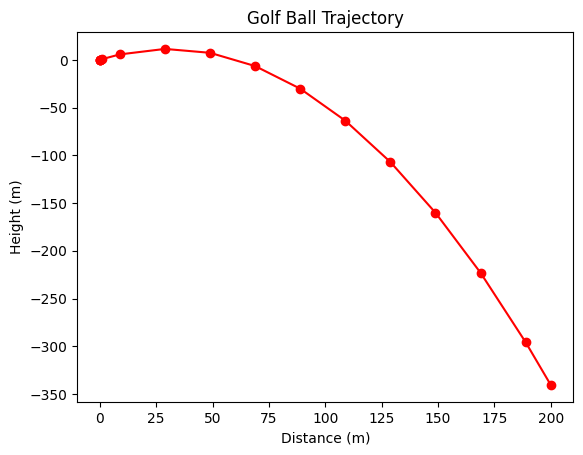

In [12]:
# Plot
plt.plot(sol.y[0], sol.y[1], 'ro-');
plt.title('Golf Ball Trajectory')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)');

## ODE Solver Controls

In [ ]:
# Maximum step size (max_step)
sol = solve_ivp(simple_golf, tspan, y0, max_step=0.5)
plt.plot(sol.y[0], sol.y[1], 'ro-')
plt.xlabel('x'); plt.ylabel('y');

In [ ]:
# Choosing solution timestamps (t_eval)
tt = np.linspace(tspan[0], tspan[1], 41)
sol = solve_ivp(simple_golf, tspan, y0, t_eval=tt)
plt.plot(sol.y[0], sol.y[1], 'ro-')
plt.xlabel('x'); plt.ylabel('y');

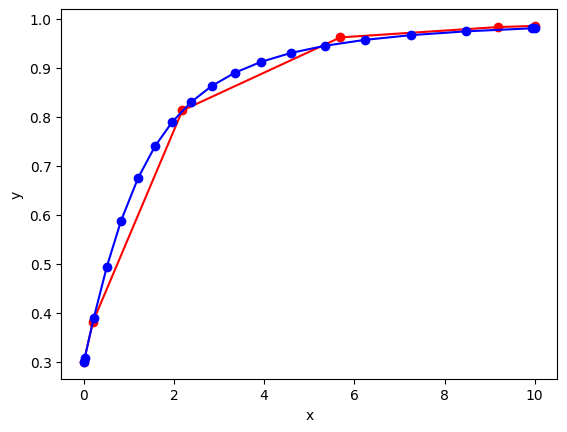

In [19]:
# Choosing error tolerances (rtol, atol)
fun = (lambda t,z: 2*z[0]*(1-z[0])/(1+t))
sol1 = solve_ivp(fun, [0,10], [0.3], rtol=1.e-2, atol=1.e-2)
sol2 = solve_ivp(fun, [0,10], [0.3], rtol=1.e-7, atol=1.e-7)
plt.plot(sol1.t, sol1.y[0], 'ro-')
plt.plot(sol2.t, sol2.y[0], 'bo-')
plt.xlabel('x'); plt.ylabel('y');

## Event Functions

In [20]:
# Define the event function
def my_event(t,z):
    return z[1]
# We want integration to terminate
my_event.terminal = True
# And we want only positive-to-negative crossings.
my_event.direction = -1

In [21]:
fun = lambda t,x: simple_golf2(t,x,10)
sol = solve_ivp(fun, tspan, y0, max_step=0.6, events=my_event)

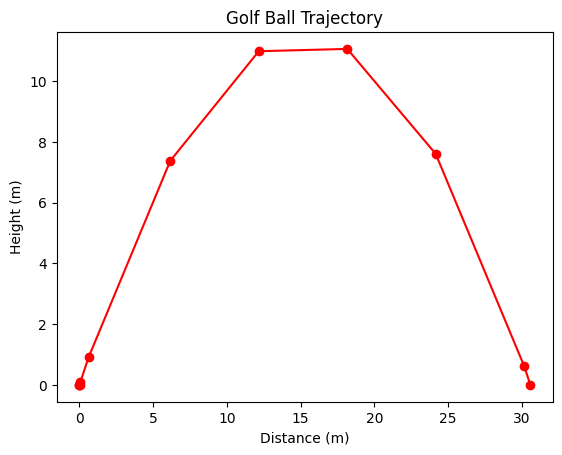

In [22]:
plt.plot(sol.y[0], sol.y[1], 'ro-');
plt.title('Golf Ball Trajectory')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)');